In [159]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
from pprint import pprint
# Visualization
import seaborn as sb
plt.style.use('ggplot')

In [184]:
#SciKit Learn Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [161]:
df = pd.read_csv('data.csv')
print(len(df), 'fights')
print(len(df.columns), 'features')

1477 fights
895 features


In [91]:
fight_features = set()
fighter_features = set()
general_features = set()

for c in df.columns:
    if (c[1:8] == '__Round'):
        fight_features.add(c[9:])
    elif c[0] == 'B' or c[0] == 'R':
        fighter_features.add(c[1:])
    else:
        general_features.add(c)
print(len(fight_features)) # features of each round
print(len(fighter_features)) # features of each fighter
print(len(general_features)) # features of each fight

87
9
7


In [119]:
team_map = {'red': 'R', 'blue': 'B'}

def collapse_fighter(fighter_dict, team, row):
    assert(type(fighter_dict) == dict)
    assert(team == 'R' or team == 'B')
    name = row[team+'_Name']
    n = fighter_dict.get(name, dict())
    n['count_'] = n.get('count_', 0) + 1
    n['Id'] = n.get(id, row['{}_ID'.format(team)])
    tmp = dict()
    rounds = row['Max_round']
    for round_ in range(1, rounds+1):
        for f in fight_features:
            tmp[f] = tmp.get(f, 0.) + row['{}__Round{}{}'.format(team, round_, f)]
            #print(f, row["{}__Round{}{}".format(team, round_, f)])
    n['Streak'] = (n.get('Streak', 0) + row['{}Streak'.format(team)])
    if team_map.get(row['winner'], "") == team:
        n['wins'] = n.get('wins', 0) + 1
    for f in fight_features:
        tmp[f] = tmp[f]/rounds
        n[f] = n.get(f, 0) + tmp[f]
    fighter_dict[name] = n

In [120]:
ndf = df
ndf = ndf.fillna(0)
fighters = dict()

for idx, row in ndf.iterrows():
    collapse_fighter(fighters, 'R', row)
    collapse_fighter(fighters, 'B', row)

In [121]:
print(len(fighters))
for fighter in fighters:
    fd = fighters[fighter]
    count = fd['count_']
    fd['Id'] = int(fd['Id'])
    for f in fight_features:
        fd[f] = fd[f]/count
    fd['Streak'] = fd['Streak']/count
    fd['wins'] = fd.get('wins', 0)
    fd['win_prob'] = fd['wins']/count
    fighters[fighter] = fd        

852


In [122]:
fighterdf = pd.DataFrame(fighters).T
fighterdf.head()

,Id,Streak,_Grappling_Reversals_Landed,_Grappling_Standups_Landed,_Grappling_Submissions_Attempts,_Grappling_Takedowns_Attempts,_Grappling_Takedowns_Landed,_Strikes_Body Significant Strikes_Attempts,_Strikes_Body Significant Strikes_Landed,_Strikes_Body Total Strikes_Attempts,...,_TIP_Guard Control Time,_TIP_Half Guard Control Time,_TIP_Misc. Ground Control Time,_TIP_Mount Control Time,_TIP_Neutral Time,_TIP_Side Control Time,_TIP_Standing Time,count_,win_prob,wins
Aaron Phillips,2237.0,0.000000,0.0,0.500000,0.166667,0.000000,0.000000,2.333333,2.000000,4.666667,...,0.000000,6.833333,2.833333,0.000000,34.833333,0.833333,45.333333,2.0,0.000000,0.0
Abdul Razak Alhassan,2634.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.0
Abel Trujillo,2013.0,1.166667,0.0,0.222222,0.111111,2.333333,0.611111,2.111111,1.055556,2.944444,...,16.166667,0.000000,13.111111,3.277778,189.333333,0.000000,225.222222,6.0,0.666667,4.0
Abner Lloveras,2730.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0
Adam Milstead,2763.0,0.500000,0.0,0.000000,0.000000,0.000000,0.000000,1.333333,0.833333,1.333333,...,0.000000,0.000000,0.000000,0.000000,59.000000,0.000000,90.000000,2.0,0.500000,1.0


In [131]:
fighterdf.sort_values('wins', ascending=False)

,Id,Streak,_Grappling_Reversals_Landed,_Grappling_Standups_Landed,_Grappling_Submissions_Attempts,_Grappling_Takedowns_Attempts,_Grappling_Takedowns_Landed,_Strikes_Body Significant Strikes_Attempts,_Strikes_Body Significant Strikes_Landed,_Strikes_Body Total Strikes_Attempts,...,_TIP_Guard Control Time,_TIP_Half Guard Control Time,_TIP_Misc. Ground Control Time,_TIP_Mount Control Time,_TIP_Neutral Time,_TIP_Side Control Time,_TIP_Standing Time,count_,win_prob,wins
Donald Cerrone,1076.0,2.923077,0.000000,0.235897,1.102564,3.400000,0.928205,27.953846,18.235897,30.261538,...,8.646154,29.810256,2.784615,25.605128,785.205128,2.738462,825.851282,13.0,0.846154,11.0
Max Holloway,1936.0,4.500000,0.000000,0.480000,0.600000,0.433333,0.193333,25.846667,20.646667,28.260000,...,2.333333,8.160000,46.526667,22.960000,545.553333,0.180000,631.000000,10.0,1.000000,10.0
Neil Magny,2047.0,2.583333,0.000000,2.816667,0.155556,9.361111,4.127778,18.855556,13.161111,34.688889,...,0.211111,48.788889,11.311111,73.911111,630.688889,3.333333,869.911111,12.0,0.833333,10.0
Beneil Dariush,2168.0,1.727273,0.000000,0.272727,1.060606,4.545455,1.696970,20.090909,12.787879,25.545455,...,35.030303,56.666667,4.848485,59.606061,408.212121,8.818182,524.818182,11.0,0.727273,8.0
Derrick Lewis,2082.0,1.400000,0.000000,1.620000,0.000000,1.553333,0.606667,2.993333,2.633333,3.446667,...,7.800000,28.840000,20.693333,38.700000,118.286667,5.540000,199.373333,10.0,0.800000,8.0
Tony Ferguson,1815.0,3.500000,0.108333,1.083333,1.358333,1.133333,0.616667,8.500000,5.100000,10.516667,...,0.000000,0.733333,30.683333,21.283333,297.533333,4.075000,323.025000,8.0,1.000000,8.0
Francisco Trinaldo,1997.0,2.900000,0.000000,1.166667,0.266667,2.933333,1.166667,19.700000,15.500000,28.566667,...,113.566667,6.533333,0.000000,21.700000,686.833333,2.433333,816.433333,10.0,0.800000,8.0
Gegard Mousasi,786.0,1.272727,0.054545,0.230303,0.636364,1.606061,1.109091,6.884848,5.872727,14.757576,...,61.515152,70.618182,0.000000,48.648485,493.018182,26.830303,552.442424,11.0,0.727273,8.0
Kelvin Gastelum,2070.0,1.111111,0.044444,0.814815,0.192593,1.429630,0.696296,14.762963,9.814815,18.444444,...,27.740741,3.200000,14.355556,23.874074,616.614815,2.622222,719.459259,9.0,0.777778,7.0
Jorge Masvidal,1272.0,1.000000,0.000000,1.366667,0.706667,2.713333,1.400000,23.773333,19.800000,31.520000,...,65.253333,26.033333,66.166667,8.253333,1185.860000,0.000000,940.966667,10.0,0.700000,7.0


Index(['wins', 'count_', 'Streak', '_Strikes_Significant Strikes_Landed',
       '_Strikes_Head Significant Strikes_Landed',
       '_Strikes_Total Strikes_Landed', '_Strikes_Head Total Strikes_Landed',
       '_Strikes_Total Strikes_Attempts',
       '_Strikes_Head Total Strikes_Attempts', '_TIP_Standing Time'],
      dtype='object')


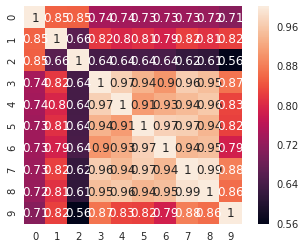

In [130]:
#
import seaborn as sns
k = 10
corrmat = fighterdf.corr()
cols = corrmat.nlargest(k, 'wins')['wins'].index
print(cols)
cm = np.corrcoef(fighterdf[cols].values.T)
sns.set()
hm = sns.heatmap(cm, cbar=True, annot=True, square=True)
plt.show()

In [282]:
df.head()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
0,1,1,23.0,182.0,Trento Italy,2783,Mezzocorona Italy,Marvin Vettori,84,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
1,0,0,32.0,175.0,"Careiro da Várzea, Amazonas Brazil",2208,"Pharr, Texas USA",Carlos Diego Ferreira,70,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB,blue
2,2,0,38.0,172.0,Kanagawa Japan,721,Tokyo Japan,Takanori Gomi,70,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red
3,0,0,23.0,170.0,Tijuana Mexico,2825,Tijuana Mexico,Brandon Moreno,56,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB,blue
4,3,1,30.0,167.0,"Spokane, WA USA",2260,"Spokane, WA USA",Elizabeth Phillips,61,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red


In [163]:
df.describe()

,BPrev,BStreak,B_Age,B_Height,B_ID,B_Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,...,R__Round5_TIP_Distance Time,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time
count,1477.000000,1477.000000,1474.000000,1476.000000,1477.000000,1477.000000,978.000000,978.000000,978.000000,978.000000,...,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,1.735274,0.654705,30.954545,177.451220,1964.633040,73.804333,0.036810,0.896728,0.431493,2.986708,...,211.965278,34.062500,66.604167,5.527778,4.319444,5.138889,12.097222,224.965278,4.562500,263.069444
std,1.895561,1.057269,4.020311,8.561541,666.949141,14.980531,0.193748,1.255722,0.830527,3.987291,...,139.412374,68.819742,94.574736,22.374419,12.854023,14.312013,36.429320,142.328509,19.698681,162.386212
min,0.000000,0.000000,20.000000,152.000000,129.000000,52.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,28.000000,172.000000,1755.000000,65.000000,0.000000,0.000000,0.000000,0.000000,...,110.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,126.750000,0.000000,139.000000
50%,1.000000,0.000000,31.000000,177.000000,2156.000000,70.000000,0.000000,0.000000,0.000000,2.000000,...,214.000000,0.000000,9.500000,0.000000,0.000000,0.000000,0.000000,232.000000,0.000000,291.000000
75%,3.000000,1.000000,34.000000,182.000000,2337.000000,84.000000,0.000000,1.000000,1.000000,4.000000,...,294.500000,47.500000,109.000000,0.000000,0.000000,0.000000,2.000000,299.000000,0.000000,300.000000
max,11.000000,7.000000,46.000000,213.000000,2882.000000,120.000000,2.000000,9.000000,6.000000,33.000000,...,647.000000,496.000000,529.000000,144.000000,91.000000,62.000000,264.000000,659.000000,128.000000,841.000000


In [164]:
df.describe(include=['O'])

,B_HomeTown,B_Location,B_Name,Date,R_HomeTown,R_Location,R_Name,winby,winner
count,1471,1470,1477,1477,1477,1476,1477,1461,1477
unique,568,431,719,224,495,390,633,3,4
top,Rio de Janeiro Brazil,Rio de Janeiro Brazil,Tim Means,07/11/2016,Rio de Janeiro Brazil,Rio de Janeiro Brazil,Donald Cerrone,DEC,red
freq,32,38,8,32,44,67,11,720,867


In [165]:
ndf = df
ndf.fillna(0, inplace=True)

In [166]:
temp_b = ndf.columns.tolist()[9:98]
blue = []
red = []
for i in temp_b:
    blue.append('B_' + i[10:])
    red.append('R_' + i[10:])
    
blue_info = ndf.columns.tolist()[0:9]
red_info = ndf.columns.tolist()[449:458] 
fight_info = ndf.columns.tolist()[444:449] + ndf.columns.tolist()[893:]
new_df_columns = fight_info + blue_info + red_info + blue + red
print(len(new_df_columns))

203


In [167]:
def filter_round(label):
    team = ''
    new_label = ''
    if len(label) > 9 and (label[:8] == 'B__Round' or label[:8] == 'R__Round'):
        team = label[0]
        new_label = label[10:]
        return team + '_'+new_label
    return None

In [168]:
aggregate_df = pd.DataFrame()

for idx, i in ndf.iterrows():
#     print(idx)
    blue_dct = dict.fromkeys(blue,0)
    red_dct = dict.fromkeys(red,0)
    temp_dct = dict()
    for j in ndf.columns:
        lbl = filter_round(j)
        if (lbl == None):
            temp_dct[j] = i[j]
        else:
            if (lbl[0] == 'B'):
                blue_dct[lbl] = blue_dct.get(lbl, 0) + i[j]
            elif (lbl[0] == 'R'):
                red_dct[lbl] = red_dct.get(lbl, 0) + i[j]
        blue_dct[lbl] = blue_dct.get(lbl, 0)/i['Last_round']
        red_dct[lbl] = red_dct.get(lbl, 0)/i['Last_round']
    temp_dct.update(blue_dct)
    temp_dct.update(red_dct)
    aggregate_df[idx] = pd.Series(temp_dct)

In [169]:
aggregate_df = aggregate_df.T
aggregate_df.head()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,Date,...,R_TIP_Distance Time,R_TIP_Ground Control Time,R_TIP_Ground Time,R_TIP_Guard Control Time,R_TIP_Half Guard Control Time,R_TIP_Misc. Ground Control Time,R_TIP_Mount Control Time,R_TIP_Neutral Time,R_TIP_Side Control Time,R_TIP_Standing Time
0,1,1,23,182,Trento Italy,2783,Mezzocorona Italy,Marvin Vettori,84,01/02/2017,...,14.9794,31.2222,46.5391,1.42798,6.2716,0,10.7078,17.5638,0.962963,26.6831
1,0,0,32,175,"Careiro da Várzea, Amazonas Brazil",2208,"Pharr, Texas USA",Carlos Diego Ferreira,70,06/30/2014,...,0,0,0,0,0,0,0,0,0,0
2,2,0,38,172,Kanagawa Japan,721,Tokyo Japan,Takanori Gomi,70,07/27/2015,...,618,105,162,0,0,19,0,676,0,790
3,0,0,23,170,Tijuana Mexico,2825,Tijuana Mexico,Brandon Moreno,56,10/03/2016,...,1431,1644,2437,311,379,0,544,1601,152,2069
4,3,1,30,167,"Spokane, WA USA",2260,"Spokane, WA USA",Elizabeth Phillips,61,08/22/2016,...,34.6132,2.13169,3.68724,0.716049,0.148148,0.625514,0.493827,39.8519,0,50.5103


In [170]:
aggregate_df.fillna(0,inplace=True)
aggregate_df.to_csv('out.csv')

In [171]:
# aggregate_df = pd.DataFrame.from_csv('out.csv')

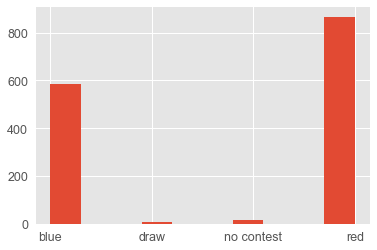

In [172]:
aggregate_df['winner'].hist()

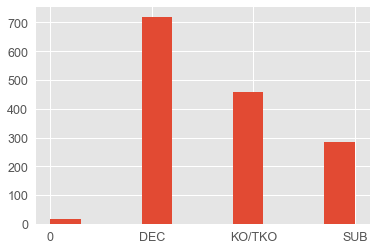

In [173]:
aggregate_df['winby'].hist()

In [178]:
dropdata = aggregate_df.drop(['B_ID','B_Name','R_ID','R_Name','winby','Date','Last_round','Max_round'],axis=1)
dropdata.rename(columns={'BPrev':'B__Prev',
                         'RPrev':'R__Prev',
                         'B_Age':'B__Age',
                         'B_Height':'B__Height',
                         'B_Weight':'B__Weight',
                         'R_Age':'R__Age',
                         'R_Height':'R__Height',
                         'R_Weight':'R__Weight',
                         'BStreak':'B__Streak',
                         'RStreak': 'R__Streak'},inplace=True)
dropdata.describe()

,B__Prev,B__Streak,B__Age,B__Height,B__Weight,Event_ID,Fight_ID,R__Prev,R__Streak,R__Age,...,R_TIP_Distance Time,R_TIP_Ground Control Time,R_TIP_Ground Time,R_TIP_Guard Control Time,R_TIP_Half Guard Control Time,R_TIP_Misc. Ground Control Time,R_TIP_Mount Control Time,R_TIP_Neutral Time,R_TIP_Side Control Time,R_TIP_Standing Time
count,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,...,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000
mean,1.735274,0.654705,30.891672,177.331077,73.804333,733.943805,5583.656060,2.125254,0.721733,31.358835,...,180.909365,54.928462,100.258080,12.938840,11.697329,4.547147,14.556669,189.378421,4.170105,232.804877
std,1.895561,1.057269,4.251308,9.724703,14.980531,50.851452,611.609705,1.979199,1.136555,4.178100,...,484.779639,188.381967,296.888901,54.106976,51.187665,19.933460,58.164258,503.299873,20.507036,606.636259
min,0.000000,0.000000,0.000000,0.000000,52.000000,646.000000,4521.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,28.000000,172.000000,65.000000,687.000000,5016.000000,1.000000,0.000000,28.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,31.000000,177.000000,70.000000,738.000000,5580.000000,2.000000,0.000000,31.000000,...,11.551440,1.468750,6.000000,0.000000,0.000000,0.000000,0.144033,12.370370,0.000000,15.724280
75%,3.000000,1.000000,34.000000,182.000000,84.000000,780.000000,6142.000000,3.000000,1.000000,34.000000,...,80.814815,13.000000,29.812500,1.864198,1.123457,0.144033,2.942387,83.840820,0.135802,104.593750
max,11.000000,7.000000,46.000000,213.000000,120.000000,816.000000,6627.000000,12.000000,9.000000,46.000000,...,5322.000000,2463.000000,3947.000000,652.000000,529.000000,255.000000,1135.000000,5426.000000,270.000000,6122.000000


In [179]:
objecttypes = list(dropdata.select_dtypes(include=['O']).columns)
for col in objecttypes:
    dropdata[col] = dropdata[col].astype('category')

In [180]:
cat_columns = dropdata.select_dtypes(['category']).columns
dropdata[cat_columns] = dropdata[cat_columns].apply(lambda x: x.cat.codes)
dropdata.info()
dropdata.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1477 entries, 0 to 1476
Columns: 192 entries, B__Prev to R_TIP_Standing Time
dtypes: float64(178), int16(4), int64(9), int8(1)
memory usage: 2.1 MB


,B__Prev,B__Streak,B__Age,B__Height,B_HomeTown,B_Location,B__Weight,Event_ID,Fight_ID,R__Prev,...,R_TIP_Distance Time,R_TIP_Ground Control Time,R_TIP_Ground Time,R_TIP_Guard Control Time,R_TIP_Half Guard Control Time,R_TIP_Misc. Ground Control Time,R_TIP_Mount Control Time,R_TIP_Neutral Time,R_TIP_Side Control Time,R_TIP_Standing Time
1472,0,0,26.0,172.0,505,331,61,689,5123,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1473,2,1,26.0,165.0,491,378,56,775,6146,3,...,22.358025,6.740741,7.000000,0.827160,2.888889,2.374486,0.061728,22.592593,0.588477,25.135802
1474,3,2,36.0,187.0,125,110,93,696,5090,1,...,2.481481,11.473251,12.905350,1.259259,3.320988,0.000000,4.115226,2.493827,0.925926,3.366255
1475,3,1,31.0,167.0,210,154,52,775,6133,4,...,164.497942,8.962963,9.716049,6.485597,0.259259,0.000000,1.604938,165.629630,0.613169,172.024691
1476,2,1,31.0,187.0,501,209,84,683,4912,1,...,5.374486,9.991770,10.000000,0.000000,0.962963,0.000000,0.633745,5.382716,0.000000,6.061728


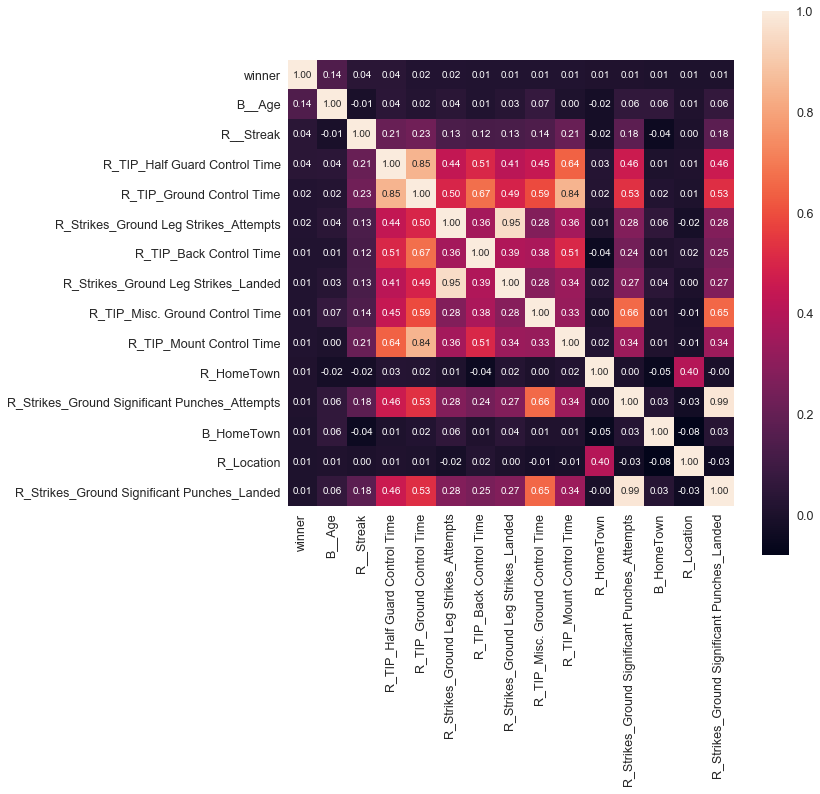

In [183]:
# Subset Correlation Matrix
k = 15 #number of variables for heatmap
corrmat = dropdata.corr()
cols = corrmat.nlargest(k, 'winner')['winner'].index
cm = np.corrcoef(dropdata[cols].values.T)
fig, ax = plt.subplots(figsize=(10,10))  
sb.set(font_scale=1.25)
hm = sb.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()